In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
X_train = pd.read_csv('/content/drive/Shareddrives/BA476/Datasets/X+Y train + test/X_train.csv', delimiter=',',index_col = False)
Y_train = pd.read_csv('/content/drive/Shareddrives/BA476/Datasets/X+Y train + test/y_train.csv', delimiter=',', index_col = False)
X_test = pd.read_csv('/content/drive/Shareddrives/BA476/Datasets/X+Y train + test/X_test.csv', delimiter=',', index_col = False)
Y_test = pd.read_csv('/content/drive/Shareddrives/BA476/Datasets/X+Y train + test/y_test.csv', delimiter=',', index_col = False)

In [3]:
# drop name, host_name, neighborhood from X_train and X_test
  # there's this weird column not sure where it comes from (the unnamed:0 one)
X_train.drop(labels=['Unnamed: 0',	'name', 'host_name', 'neighbourhood'], axis=1, inplace=True)
X_test.drop(labels=['Unnamed: 0','name', 'host_name', 'neighbourhood'], axis=1, inplace=True)
Y_train.drop(labels=['Unnamed: 0'], axis=1, inplace = True)
Y_test.drop(labels=['Unnamed: 0'], axis=1, inplace = True)

In [4]:
Y_train = Y_train['price']
Y_test = Y_test['price']

In [5]:
# Baseline 
baseline = Y_train.mean()
baseline

214.3409741257267

In [6]:
# Naive Baseline
naive = np.mean((Y_test - baseline)**2)
np.sqrt(naive)

385.03951221399467

In [7]:
X_train.columns

Index(['minimum_nights', 'number_of_reviews', 'availability_365',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype='object')

In [8]:
np.mean(Y_test)

213.25469879518073

In [9]:
np.mean(Y_train)

214.3409741257267

In [10]:
Y_test.max()

10000

In [11]:
Y_train.max()

19750

**LINEAR REGRESSION**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
Linear = LinearRegression(fit_intercept=True)      # 2. instantiate model
Linear.fit(X_train, Y_train)                      # 3. fit model to data

Linear.coef_, Linear.intercept_

(array([  -0.98032423,   -0.35926126,    0.28748903,   14.31535378,
         156.46983063,  -61.95159853, -108.83358588,  -57.96085599,
           1.56109382,  132.75934454,  -28.95319086,  -47.40639151]),
 170.4710372202638)

In [13]:
#MSE on Training Data
Y_train_hat = Linear.predict(X_train)
rmse_train =  np.sqrt(mean_squared_error(Y_train, Y_train_hat))
print(rmse_train)

392.8723471985786


In [14]:
#MSE on Test Data
Y_test_hat = Linear.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(Y_test, Y_test_hat))
print(rmse_test)

372.87982051887224


**LASSO REGRESSION**

In [15]:
from sklearn.linear_model import LassoCV
scaler = StandardScaler() 
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)
reg = LassoCV().fit(X_std_train, Y_train)

Text(0, 0.5, 'Mean Squared Error')

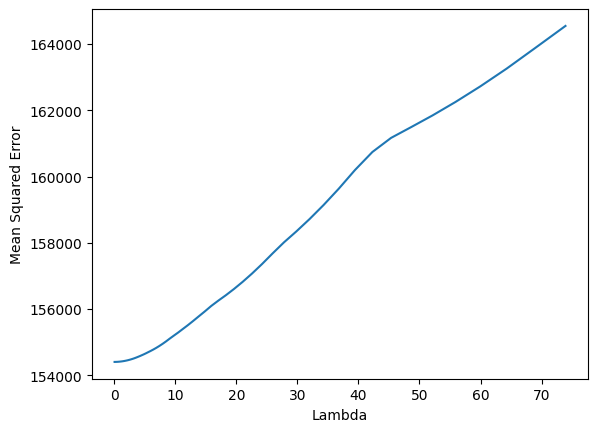

In [16]:
plt.plot(reg.alphas_, reg.mse_path_.mean(axis =1))
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = reg.alpha_)
lasso.fit(X_std_train, Y_train)

Lasso(alpha=0.07390432427773151)

In [18]:
#Co-efficients for Lasso
lasso.coef_

array([-29.57009055, -20.04167991,  41.3001658 ,  37.7522515 ,
        13.46509348,  -0.        ,  -5.21751777, -11.30874093,
         0.        ,  64.67495809, -10.98327027,  -4.72407892])

In [19]:
lasso.intercept_

214.3409741257267

In [20]:
# Predict on training data
Y_train_fit_lasso = lasso.predict(X_std_train)
rmse_lasso_train = np.sqrt(mean_squared_error(Y_train, Y_train_fit_lasso))
print(rmse_lasso_train)

392.87241497322947


In [21]:
# Predict on testing data
Y_test_fit_lasso = lasso.predict(X_std_test)
rmse_lasso_test = np.sqrt(mean_squared_error(Y_test, Y_test_fit_lasso))
print(rmse_lasso_test)

372.87385849362835


**Ridge Regression**

In [22]:
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(cv = 5).fit(X_std_train, Y_train)
reg2.alpha_

10.0

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = reg2.alpha_)
ridge.fit(X_std_train, Y_train)

Ridge(alpha=10.0)

In [24]:
ridge.coef_

array([-29.64865579, -20.12559712,  41.37300502,  19.18895099,
        11.20684899, -18.52107971,  -9.51143211, -18.74948208,
       -18.65418695,  45.72452352, -24.99693103,  -8.57723856])

In [25]:
# Predict on training data
Y_train_fit_ridge = ridge.predict(X_std_train)
rmse_ridge_train = np.sqrt(mean_squared_error(Y_train, Y_train_fit_ridge))
print(rmse_ridge_train)

392.8723479184543


In [26]:
# Predict on testing data
Y_test_fit_ridge = ridge.predict(X_std_test)
rmse_ridge_test = np.sqrt(mean_squared_error(Y_test, Y_test_fit_ridge))
print(rmse_ridge_test)

372.87935807119715


**Decision Trees**

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

# Use X_train and Y_train
dt = DecisionTreeRegressor(min_samples_leaf=0.0001)
dt.fit(X_train, Y_train) 
y_train_pred = dt.predict(X_train)  # Use X_train
mse_train = mean_squared_error(Y_train, y_train_pred)  # Use Y_train


# Evaluate tree on the test data
y_test_pred = dt.predict(X_test)  # Use X_test
mse_test = mean_squared_error(Y_test, y_test_pred)  # Use Y_test




rmse_train = np.sqrt(mse_train)
print('RMSE (training): {:.3f}'.format(rmse_train))

rmse_test = np.sqrt(mse_test)
print('RMSE (test): {:.3f}'.format(rmse_test))

RMSE (training): 319.845
RMSE (test): 366.425


In [28]:
print(X_train.columns)

Index(['minimum_nights', 'number_of_reviews', 'availability_365',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype='object')


In [29]:
predictors1=['minimum_nights', 'number_of_reviews', 'availability_365',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [30]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

max_depths = range(1, 20)

# random pick smaller range data 
X_train_small = X_train[:1000]
Y_train_small = Y_train[:1000]

cv_scores = []
for depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    scores = cross_val_score(dt, X_train_small[predictors1], Y_train_small, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-1 * scores.mean())

Best value of max_depth: 4


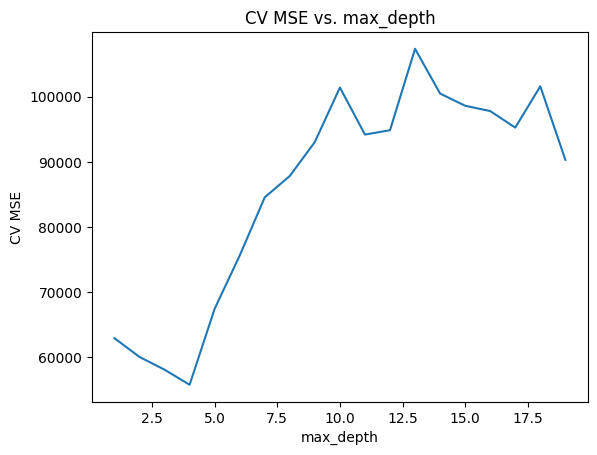

In [31]:
best_index = cv_scores.index(min(cv_scores))

plt.plot(max_depths, cv_scores)
plt.xlabel('max_depth')
plt.ylabel('CV MSE')
plt.title('CV MSE vs. max_depth')

#Best value
print('Best value of max_depth:', max_depths[best_index])

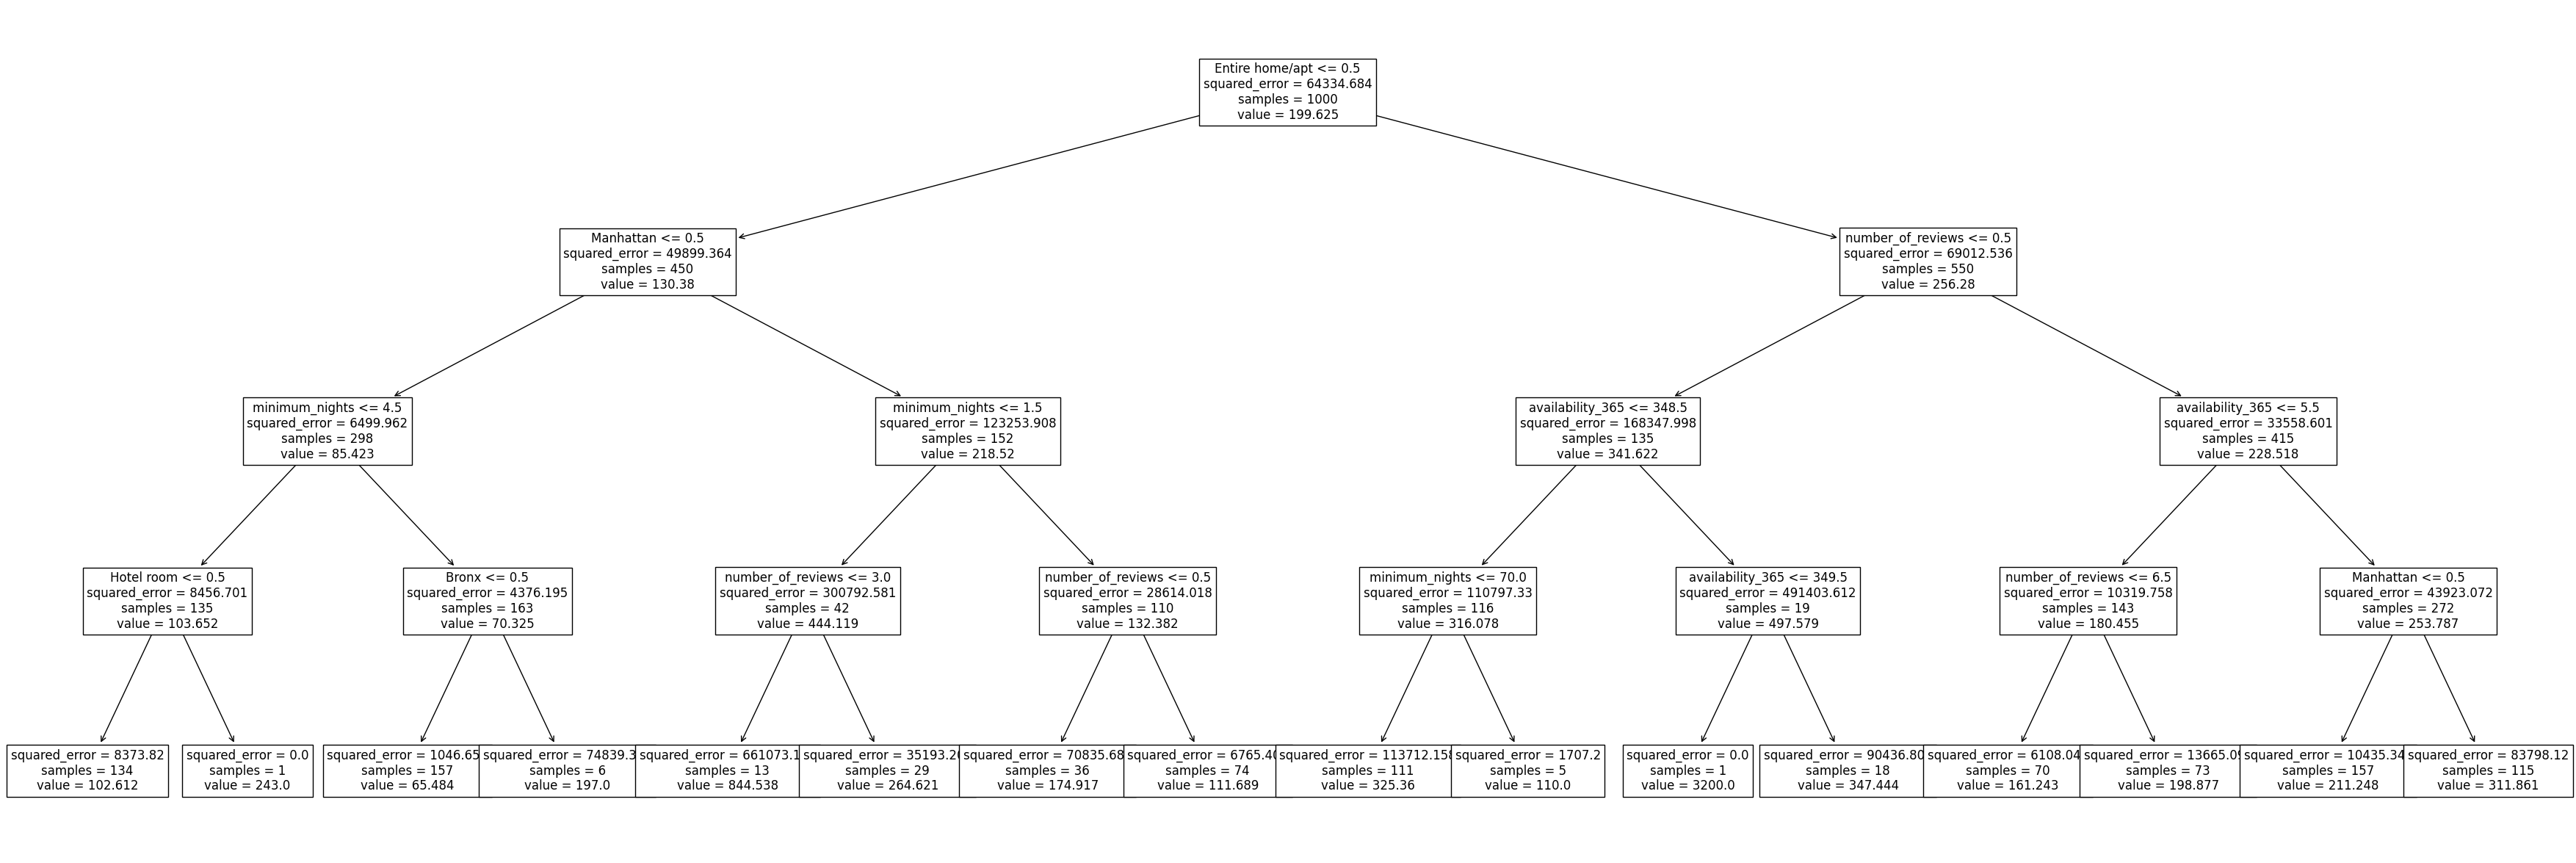

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(45, 15))

# Define a range of max_depth values
max_depths = [4]

# Use a smaller dataset to train 
X_train_small = X_train[:1000]
Y_train_small = Y_train[:1000]

ctr = 1
for depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train_small[predictors1], Y_train_small)
    plt.subplot(1, len(max_depths), ctr)
    ctr += 1
    tree.plot_tree(dt, feature_names=predictors1, fontsize=12)

plt.show()  # Add this line to display the plot


**RANDOM FORESTS**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=0.0001)
rf.fit(X_train, Y_train.values.ravel())  # Use Y_train and ravel to convert to 1D array

# Evaluate the random forest on the test set
y_test_pred = rf.predict(X_test)  # Use X_test
mse_test = mean_squared_error(Y_test, y_test_pred)  # Use Y_test

print('Random Forest:')

rmse_test = np.sqrt(mse_test)
print('RMSE (test): {:.2f}'.format(rmse_test))


Random Forest:
RMSE (test): 352.98


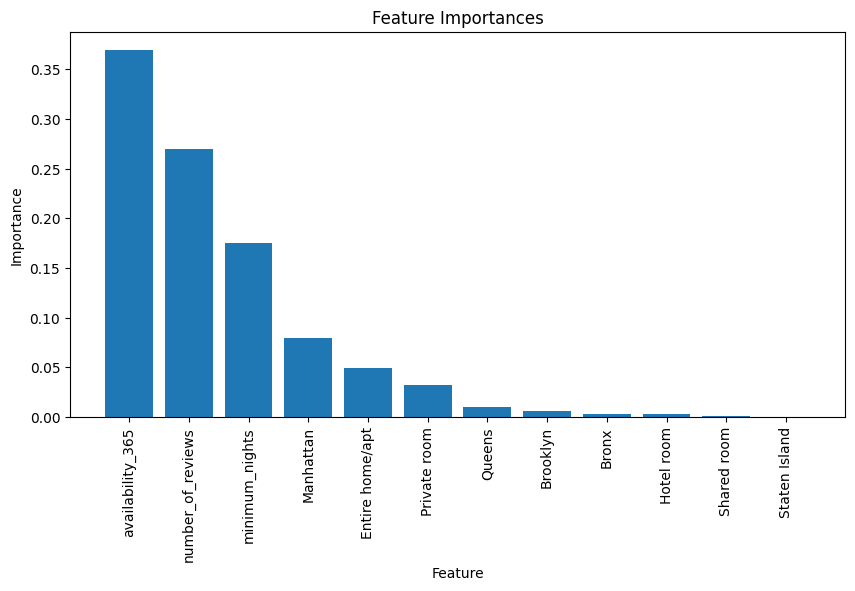

    importance            feature
2     0.369310   availability_365
1     0.269876  number_of_reviews
0     0.175559     minimum_nights
9     0.079888          Manhattan
3     0.049452    Entire home/apt
5     0.032216       Private room
10    0.010029             Queens
8     0.006411           Brooklyn
7     0.002962              Bronx
4     0.002721         Hotel room
6     0.001357        Shared room
11    0.000218      Staten Island


In [34]:
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'importance': feature_importances, 'feature': predictors1})

# Sort 
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
print(importance_df)

**BOOSTING**

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

decision_stump = DecisionTreeRegressor(max_depth=1)

ada = AdaBoostRegressor(base_estimator=decision_stump, n_estimators=100, learning_rate=0.1)
ada.fit(X_train, Y_train)
feature_importances = ada.feature_importances_

Y_train_pred = ada.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))


Y_test_pred = ada.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

for i, feature_name in enumerate(X_train.columns):
    print(f"{feature_name}: {feature_importances[i]}")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


minimum_nights: 0.0
number_of_reviews: 0.6377741468589173
availability_365: 0.0727268848570775
Entire home/apt: 0.0
Hotel room: 0.0
Private room: 0.0
Shared room: 0.0
Bronx: 0.0
Brooklyn: 0.0
Manhattan: 0.28949896828400495
Queens: 0.0
Staten Island: 0.0
Train RMSE: 450.9821168037224
Test RMSE: 441.44072593142664


In [36]:
#regression boosting
from xgboost import XGBRegressor
boost = XGBRegressor()
boost.fit(X_train, Y_train)

Y_predtest = boost.predict(X_test)
mse = mean_squared_error(Y_test, Y_predtest)
rmse = np.sqrt(mse)

Y_predtrain = boost.predict(X_train)
mse2 = mean_squared_error(Y_train, Y_predtrain)
rmse2 = np.sqrt(mse2)

feature_importances = boost.feature_importances_

for i, feature_name in enumerate(X_train.columns):
    print(f"{feature_name}: {feature_importances[i]}")

print("Test RMSE:", rmse)
print("Train RMSE:", rmse2)
#appendix?

minimum_nights: 0.09560108929872513
number_of_reviews: 0.0852387472987175
availability_365: 0.09301669150590897
Entire home/apt: 0.1682354062795639
Hotel room: 0.054786600172519684
Private room: 0.12750361859798431
Shared room: 0.026632050052285194
Bronx: 0.10248314589262009
Brooklyn: 0.02884790487587452
Manhattan: 0.16489854454994202
Queens: 0.0393981970846653
Staten Island: 0.013358021154999733
Test RMSE: 373.03808929543425
Train RMSE: 296.48145225203456


K-nearest neighbors algorithm

In [42]:
# KNN- Predict whether or not airbnb is open using price
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# split dataset


predictors = ["minimum_nights", "number_of_reviews" ,"availability_365"]




X_train = X_train[predictors]
X_test = X_test[predictors]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors 


knn = KNeighborsClassifier()
knn_range = list(range(1, 30))
parameter_grid = dict(n_neighbors=knn_range) 

grid = GridSearchCV(knn, parameter_grid, scoring= "neg_mean_squared_error", cv=20)
grid.fit(X_train, Y_train)
print(grid.best_params_)
Y_train_fit = grid.predict(X_train)
mse_train = np.mean( (Y_train - Y_train_fit)**2 )
print("Train RMSE:", np.sqrt(mse_train))

Y_test_fit = grid.predict(X_test) 
mse_test = np.mean( (Y_test - Y_test_fit)**2 )
print("Test RMSE: " , np.sqrt(mse_test))






/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


{'n_neighbors': 2}
Train RMSE: 395.6067482970578
Test RMSE:  392.81236883330666


**STEPWISE REGRESSION**

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()

while len(X_train.columns): 
    feature_to_remove = model.pvalues.drop('const').idxmax()
    X_train.drop(feature_to_remove, axis=1, inplace=True)
    X_test.drop(feature_to_remove, axis=1, inplace=True)
    model = sm.OLS(Y_train, X_train).fit()
    print(model.summary())
    
    if model.pvalues.drop('const').max() < 0.05:
        break

Y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

X_test = sm.add_constant(X_test)
Y_pred_test = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))

print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 01 May 2023   Prob (F-statistic):           3.28e-92
Time:                        13:47:07   Log-Likelihood:            -2.4628e+05
No. Observations:               33199   AIC:                         4.926e+05
Df Residuals:                   33196   BIC:                         4.926e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              189.6920      3.495  